In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

mcn_lightblue = '#0085ca'
mcn_yellow = '#ffc000'
mcn_navy = '#002d72'

In [ ]:
shen = pd.read_table("predictions_shendure.csv", index_col=0, sep=',')
shen
cr = pd.read_table("predictions_cohen_retina.csv", index_col=0, sep=',')
cr
cm = pd.read_table("predictions_cohen_multi.csv", index_col=0, sep=',')
cm

,rep_id,CRE_id,cell_type,observed_umis_MPRA_BC,nb,pm
1,1,chr8_56986998_56987131_-,Hek 293,29,2.734506,2.751748
2,1,chr17_5522677_5522810_-,Hek 293,269,3.233955,3.317587
3,1,chr19_24269928_24270061_+,Hek 293,52,2.519020,2.535828
4,1,chr21_34398176_34398309_+,Ambiguous,73,3.044638,2.840530
5,1,chr9_136215006_136215139_+,Hek 293,147,2.866775,2.899052
...,...,...,...,...,...,...
735989,2,chr4_1166304_1166437_-,Hek 293,1,2.059637,2.086834
735990,2,chr11_76092300_76092433_+,Hek 293,1,2.031048,2.011748
735991,2,chrX_110339352_110339485_+,Hek 293,1,1.987356,2.014728
735992,2,chr11_5646168_5646301_+,Hek 293,1,2.105491,2.081492


<Axes: xlabel='observed_umis_MPRA_BC', ylabel='Count'>

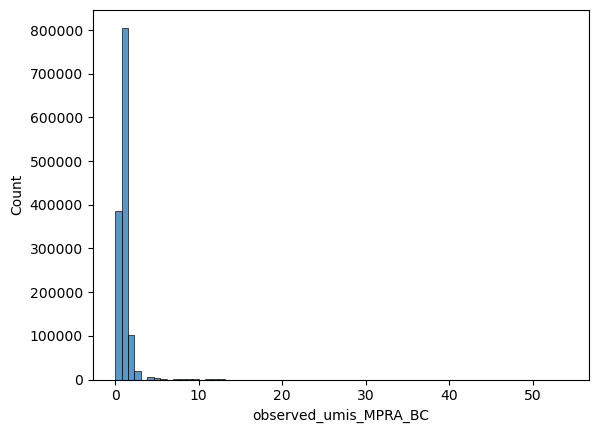

In [7]:
sns.histplot(cr.observed_umis_MPRA_BC, bins=70)

In [7]:
shen_grouped = shen.groupby(by=["cell_type", "CRE_id"]).sum()
cr_grouped = cr.groupby(by=["cell_type", "CRE_id"]).sum()
cm_grouped = cm.groupby(by=["cell_type", "CRE_id"]).sum()


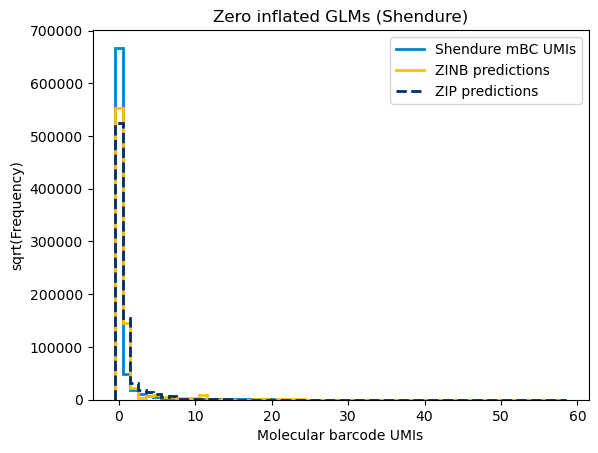

In [8]:
bins = np.arange(60) - 0.5
plt.hist(np.sqrt(shen['shendure_umis_mbc']), bins=bins, histtype='step', color = mcn_lightblue, linewidth=2)
plt.hist(np.sqrt(shen['zinb']), bins=bins, histtype='step', color = mcn_yellow, linewidth=2, linestyle='-')
plt.hist(np.sqrt(shen['zip']), bins=bins, histtype='step', color = mcn_navy, linewidth=2, linestyle='--')
#plt.xticks(range(20))
#plt.xlim([-1, 20])
#plt.ylim([0,400000])

plt.title('Zero inflated GLMs (Shendure)')
plt.xlabel('Molecular barcode UMIs')
plt.ylabel('sqrt(Frequency)')

colors = ['#0085ca', '#ffc000', '#002d72']
styles = ['-', '-', '--']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle=s) for c,s in zip(colors, styles)]
labels = ['Shendure mBC UMIs', 'ZINB predictions', 'ZIP predictions']
plt.legend(lines, labels)
#plt.savefig('real_zeroinfl_dist.svg')
plt.show()

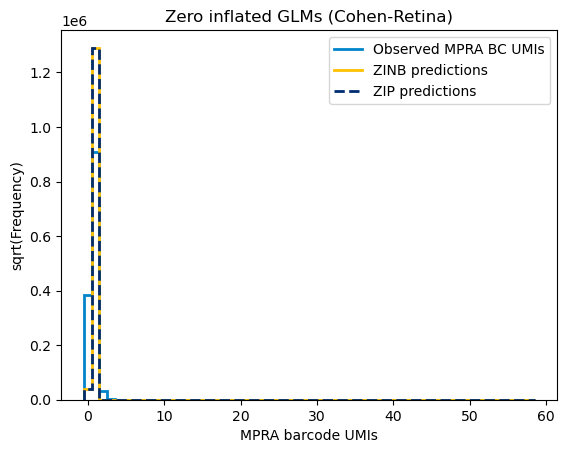

In [10]:
bins = np.arange(60) - 0.5
plt.hist(np.sqrt(cr['observed_umis_MPRA_BC']), bins=bins, histtype='step', color = mcn_lightblue, linewidth=2)
plt.hist(np.sqrt(cr['zinb']), bins=bins, histtype='step', color = mcn_yellow, linewidth=2, linestyle='-')
plt.hist(np.sqrt(cr['zip']), bins=bins, histtype='step', color = mcn_navy, linewidth=2, linestyle='--')
#plt.xticks(range(20))
#plt.xlim([-1, 20])
#plt.ylim([0,400000])

plt.title('Zero inflated GLMs (Cohen-Retina)')
plt.xlabel('MPRA barcode UMIs')
plt.ylabel('sqrt(Frequency)')

colors = ['#0085ca', '#ffc000', '#002d72']
styles = ['-', '-', '--']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle=s) for c,s in zip(colors, styles)]
labels = ['Observed MPRA BC UMIs', 'ZINB predictions', 'ZIP predictions']
plt.legend(lines, labels)
#plt.savefig('real_zeroinfl_dist.svg')
plt.show()

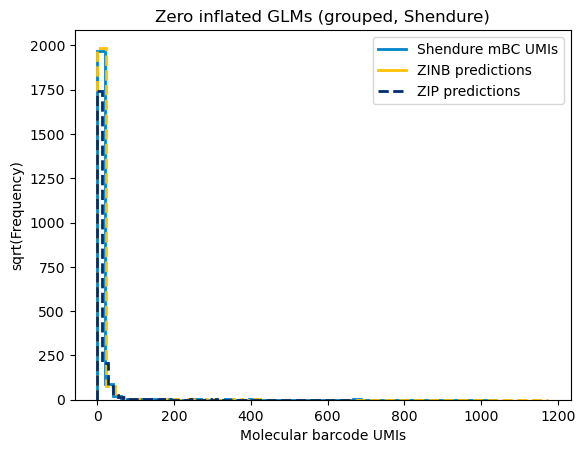

In [11]:
bins = 50
plt.hist(np.sqrt(shen_grouped['shendure_umis_mbc']), bins=bins, histtype='step', color = mcn_lightblue, linewidth=2)
plt.hist(np.sqrt(shen_grouped['zinb']), bins=bins, histtype='step', color = mcn_yellow, linewidth=2, linestyle='--')
plt.hist(np.sqrt(shen_grouped['zip']), bins=bins, histtype='step', color = mcn_navy, linewidth=2, linestyle='--')
#plt.xticks(range(20))
#plt.xlim([-1, 20])
#plt.ylim([0,400000])

plt.title('Zero inflated GLMs (grouped, Shendure)')
plt.xlabel('Molecular barcode UMIs')
plt.ylabel('sqrt(Frequency)')

colors = ['#0085ca', '#ffc000', '#002d72']
styles = ['-', '-', '--']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle=s) for c,s in zip(colors, styles)]
labels = ['Shendure mBC UMIs', 'ZINB predictions', 'ZIP predictions']
plt.legend(lines, labels)
#plt.savefig('real_zeroinfl_dist.svg')
plt.show()

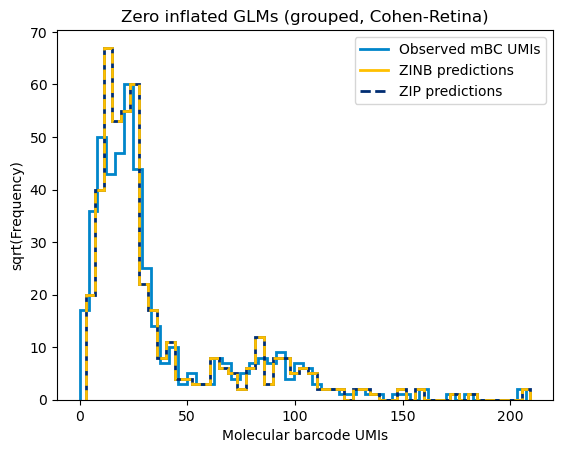

In [18]:
bins = 50
plt.hist(np.sqrt(cr_grouped['observed_umis_MPRA_BC']), bins=bins, histtype='step', color = mcn_lightblue, linewidth=2)
plt.hist(np.sqrt(cr_grouped['zip']), bins=bins, histtype='step', color = mcn_navy, linewidth=2, linestyle='-')
plt.hist(np.sqrt(cr_grouped['zinb']), bins=bins, histtype='step', color = mcn_yellow, linewidth=2, linestyle='--')

#plt.xticks(range(20))
#plt.xlim([-1, 20])
#plt.ylim([0,400000])

plt.title('Zero inflated GLMs (grouped, Cohen-Retina)')
plt.xlabel('Molecular barcode UMIs')
plt.ylabel('sqrt(Frequency)')

colors = ['#0085ca', '#ffc000', '#002d72']
styles = ['-', '-', '--']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle=s) for c,s in zip(colors, styles)]
labels = ['Observed mBC UMIs', 'ZINB predictions', 'ZIP predictions']
plt.legend(lines, labels)
#plt.savefig('real_zeroinfl_dist.svg')
plt.show()

/home/eng26/.conda/envs/scmpra/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


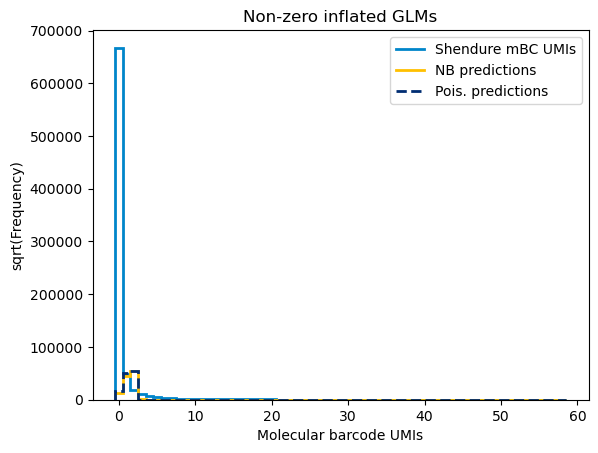

In [4]:
bins = np.arange(60) - 0.5
plt.hist(np.sqrt(preds['shendure_umis_mbc']), bins=bins, histtype='step', color = mcn_lightblue, linewidth=2)
plt.hist(np.sqrt(preds['nb']), bins=bins, histtype='step', color = mcn_yellow, linewidth=2, linestyle='-')
plt.hist(np.sqrt(preds['pm']), bins=bins, histtype='step', color = mcn_navy, linewidth=2, linestyle='--')
#plt.xticks(range(20))
#plt.xlim([-1, 20])
#plt.ylim([0,400000])
plt.title('Non-zero inflated GLMs')
plt.xlabel('Molecular barcode UMIs')
plt.ylabel('sqrt(Frequency)')

colors = ['#0085ca', '#ffc000', '#002d72']
styles = ['-', '-', '--']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle=s) for c,s in zip(colors, styles)]
labels = ['Shendure mBC UMIs', 'NB predictions', 'Pois. predictions']
plt.legend(lines, labels)
plt.savefig('real_noninfl_dist.svg')
plt.show()

/home/eng26/.conda/envs/scmpra/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


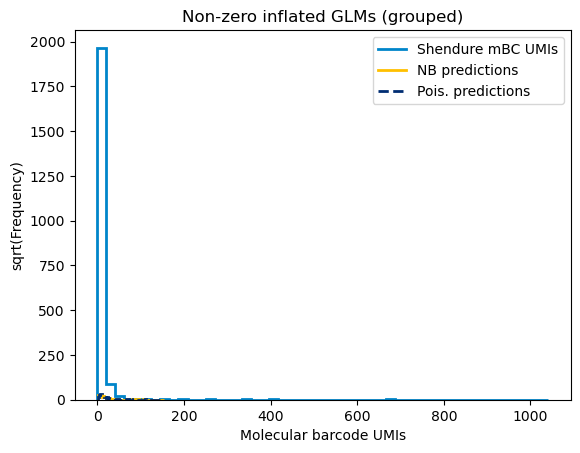

In [9]:
bins = 50
plt.hist(np.sqrt(preds_grouped['shendure_umis_mbc']), bins=bins, histtype='step', color = mcn_lightblue, linewidth=2)
plt.hist(np.sqrt(preds_grouped['nb']), bins=bins, histtype='step', color = mcn_yellow, linewidth=2, linestyle='-')
plt.hist(np.sqrt(preds_grouped['pm']), bins=bins, histtype='step', color = mcn_navy, linewidth=2, linestyle='--')
#plt.xticks(range(20))
#plt.xlim([-1, 20])
#plt.ylim([0,400000])
plt.title('Non-zero inflated GLMs (grouped)')
plt.xlabel('Molecular barcode UMIs')
plt.ylabel('sqrt(Frequency)')

colors = ['#0085ca', '#ffc000', '#002d72']
styles = ['-', '-', '--']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle=s) for c,s in zip(colors, styles)]
labels = ['Shendure mBC UMIs', 'NB predictions', 'Pois. predictions']
plt.legend(lines, labels)
#plt.savefig('real_noninfl_dist.svg')
plt.show()

In [6]:
preds.CRE_id.unique().shape

(212,)

In [7]:
preds.shendure_umis_mbc - preds.zinb 

1         -0.006904
2         -0.006891
3         -0.018519
4         -0.103874
5         -0.049138
            ...    
778244    -0.019795
778245    -0.045609
778246    -1.359771
778247    -0.068529
778248   -48.078818
Length: 778248, dtype: float64

In [23]:
preds['zinb_res'] = preds.shendure_umis_mbc - preds.zinb 
preds['zip_res'] = preds.shendure_umis_mbc - preds.zip
preds['nb_res'] = preds.shendure_umis_mbc - preds.nb 
preds['pm_res'] = preds.shendure_umis_mbc - preds.pm 

preds['shendure_umis_mbc_no_zeros'] = preds['shendure_umis_mbc'].replace(0,1,inplace=False)

preds['zinb_resnorm'] = preds.zinb_res /  preds.shendure_umis_mbc_no_zeros
preds['zip_resnorm'] = preds.zip_res /  preds.shendure_umis_mbc_no_zeros
preds['nb_resnorm'] = preds.nb_res /  preds.shendure_umis_mbc_no_zeros
preds['pm_resnorm'] = preds.pm_res /  preds.shendure_umis_mbc_no_zeros

In [11]:
preds_grouped['zinb_res'] = preds_grouped.shendure_umis_mbc - preds_grouped.zinb 
preds_grouped['zip_res'] = preds_grouped.shendure_umis_mbc - preds_grouped.zip
preds_grouped['nb_res'] = preds_grouped.shendure_umis_mbc - preds_grouped.nb 
preds_grouped['pm_res'] = preds_grouped.shendure_umis_mbc - preds_grouped.pm 

preds_grouped['shendure_umis_mbc_no_zeros'] = preds_grouped['shendure_umis_mbc'].replace(0,1,inplace=False)

preds_grouped['zinb_resnorm'] = preds_grouped.zinb_res /  preds_grouped.shendure_umis_mbc_no_zeros
preds_grouped['zip_resnorm'] = preds_grouped.zip_res /  preds_grouped.shendure_umis_mbc_no_zeros
preds_grouped['nb_resnorm'] = preds_grouped.nb_res /  preds_grouped.shendure_umis_mbc_no_zeros
preds_grouped['pm_resnorm'] = preds_grouped.pm_res /  preds_grouped.shendure_umis_mbc_no_zeros

In [9]:
preds

,rep_id,CRE_id,CRE_class,cell_type,umis_obc,shendure_umis_mbc,zinb,nb,pm,zip,zinb_res,zip_res,nb_res,pm_res,shendure_umis_mbc_no_zeros,zinb_resnorm,zip_resnorm,nb_resnorm,pm_resnorm
1,2B1,Btg1_chr10_9572,devCRE,Neuroectoderm (brain),67,0,0.006904,-4.975608,-4.393134,0.013176,-0.006904,-0.013176,4.975608,4.393134,1,-0.006904,-0.013176,4.975608,4.393134
2,2B1,Gata4_chr14_5710,devCRE,Neuroectoderm (brain),159,0,0.006891,-4.977537,-4.500792,0.011484,-0.006891,-0.011484,4.977537,4.500792,1,-0.006891,-0.011484,4.977537,4.500792
3,2B1,Klf4_chr4_3952,devCRE,Neuroectoderm (brain),89,0,0.018519,-3.988979,-3.483468,0.034442,-0.018519,-0.034442,3.988979,3.483468,1,-0.018519,-0.034442,3.988979,3.483468
4,2B1,Lama1_chr17_7793,devCRE,Neuroectoderm (brain),147,0,0.103874,-2.264571,-1.843257,0.206667,-0.103874,-0.206667,2.264571,1.843257,1,-0.103874,-0.206667,2.264571,1.843257
5,2B1,Sox17_chr1_67,devCRE,Neuroectoderm (brain),58,0,0.049138,-3.013114,-2.552878,0.086737,-0.049138,-0.086737,3.013114,2.552878,1,-0.049138,-0.086737,3.013114,2.552878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778244,B2,Sparc_chr11_7207,devCRE,Ex. Endoderm (visceral),104,0,0.019795,-3.922328,-3.666372,0.029164,-0.019795,-0.029164,3.922328,3.666372,1,-0.019795,-0.029164,3.922328,3.666372
778245,B2,Tgfbi_chr13_5735,devCRE,Ex. Endoderm (visceral),98,0,0.045609,-3.087647,-2.831790,0.070976,-0.045609,-0.070976,3.087647,2.831790,1,-0.045609,-0.070976,3.087647,2.831790
778246,B2,Tgfbi_chr13_5741,devCRE,Ex. Endoderm (visceral),68,1,2.359771,0.858566,0.948886,1.609839,-1.359771,-0.609839,0.141434,0.051114,1,-1.359771,-0.609839,0.141434,0.051114
778247,B2,noP,promoters,Ex. Endoderm (visceral),166,0,0.068529,-2.680498,-2.316487,0.122025,-0.068529,-0.122025,2.680498,2.316487,1,-0.068529,-0.122025,2.680498,2.316487


# plot by cres

In [10]:
cres = list(preds.CRE_id.unique())
cres_grouped = list(preds_grouped.CRE_id.unique())

In [11]:
mean_abs = preds.groupby(['CRE_id'])['zinb_res'].apply(lambda x: np.mean(np.abs(x))).sort_values(ascending=True)


In [17]:
def subplots_cre(suptitle, ylab, xlab, meany, y, outliers):
    fig, axs = plt.subplots(5,1, figsize=(30,40))
    fig.suptitle(suptitle)
    fig.subplots_adjust(hspace=1)

    counter = 0
    for ax in axs:
        ax.tick_params(axis='x', rotation=90)
        ax.set_ylabel(ylab)
        ax.set_xlabel(xlab)
        sns.boxplot(data = preds[preds.CRE_id.isin(mean_abs[counter:counter+50].index)], x = 'CRE_id', y = y, order = mean_abs[counter:counter+50].index, ax=ax, showfliers=outliers, color = mcn_lightblue)
        ax.axhline(y = meany, color = mcn_yellow, linestyle = '--')
        if counter == 200:
            ax.set_title("%s-%s" % (str(counter+1), str(213)))
        
        else:
            ax.set_title("%s-%s" % (str(counter+1), str(counter+50)))
        counter += 50

    return counter


In [12]:
st = 'ZINB Residuals by CRE sorted by increasing mean:'
yl = 'raw residuals'
xl = 'CRE ID'
my = -0.0519225809675359
y = 'zinb_res'
o = True
c = subplots_cre(st, yl, xl, my, y, o)


KeyboardInterrupt



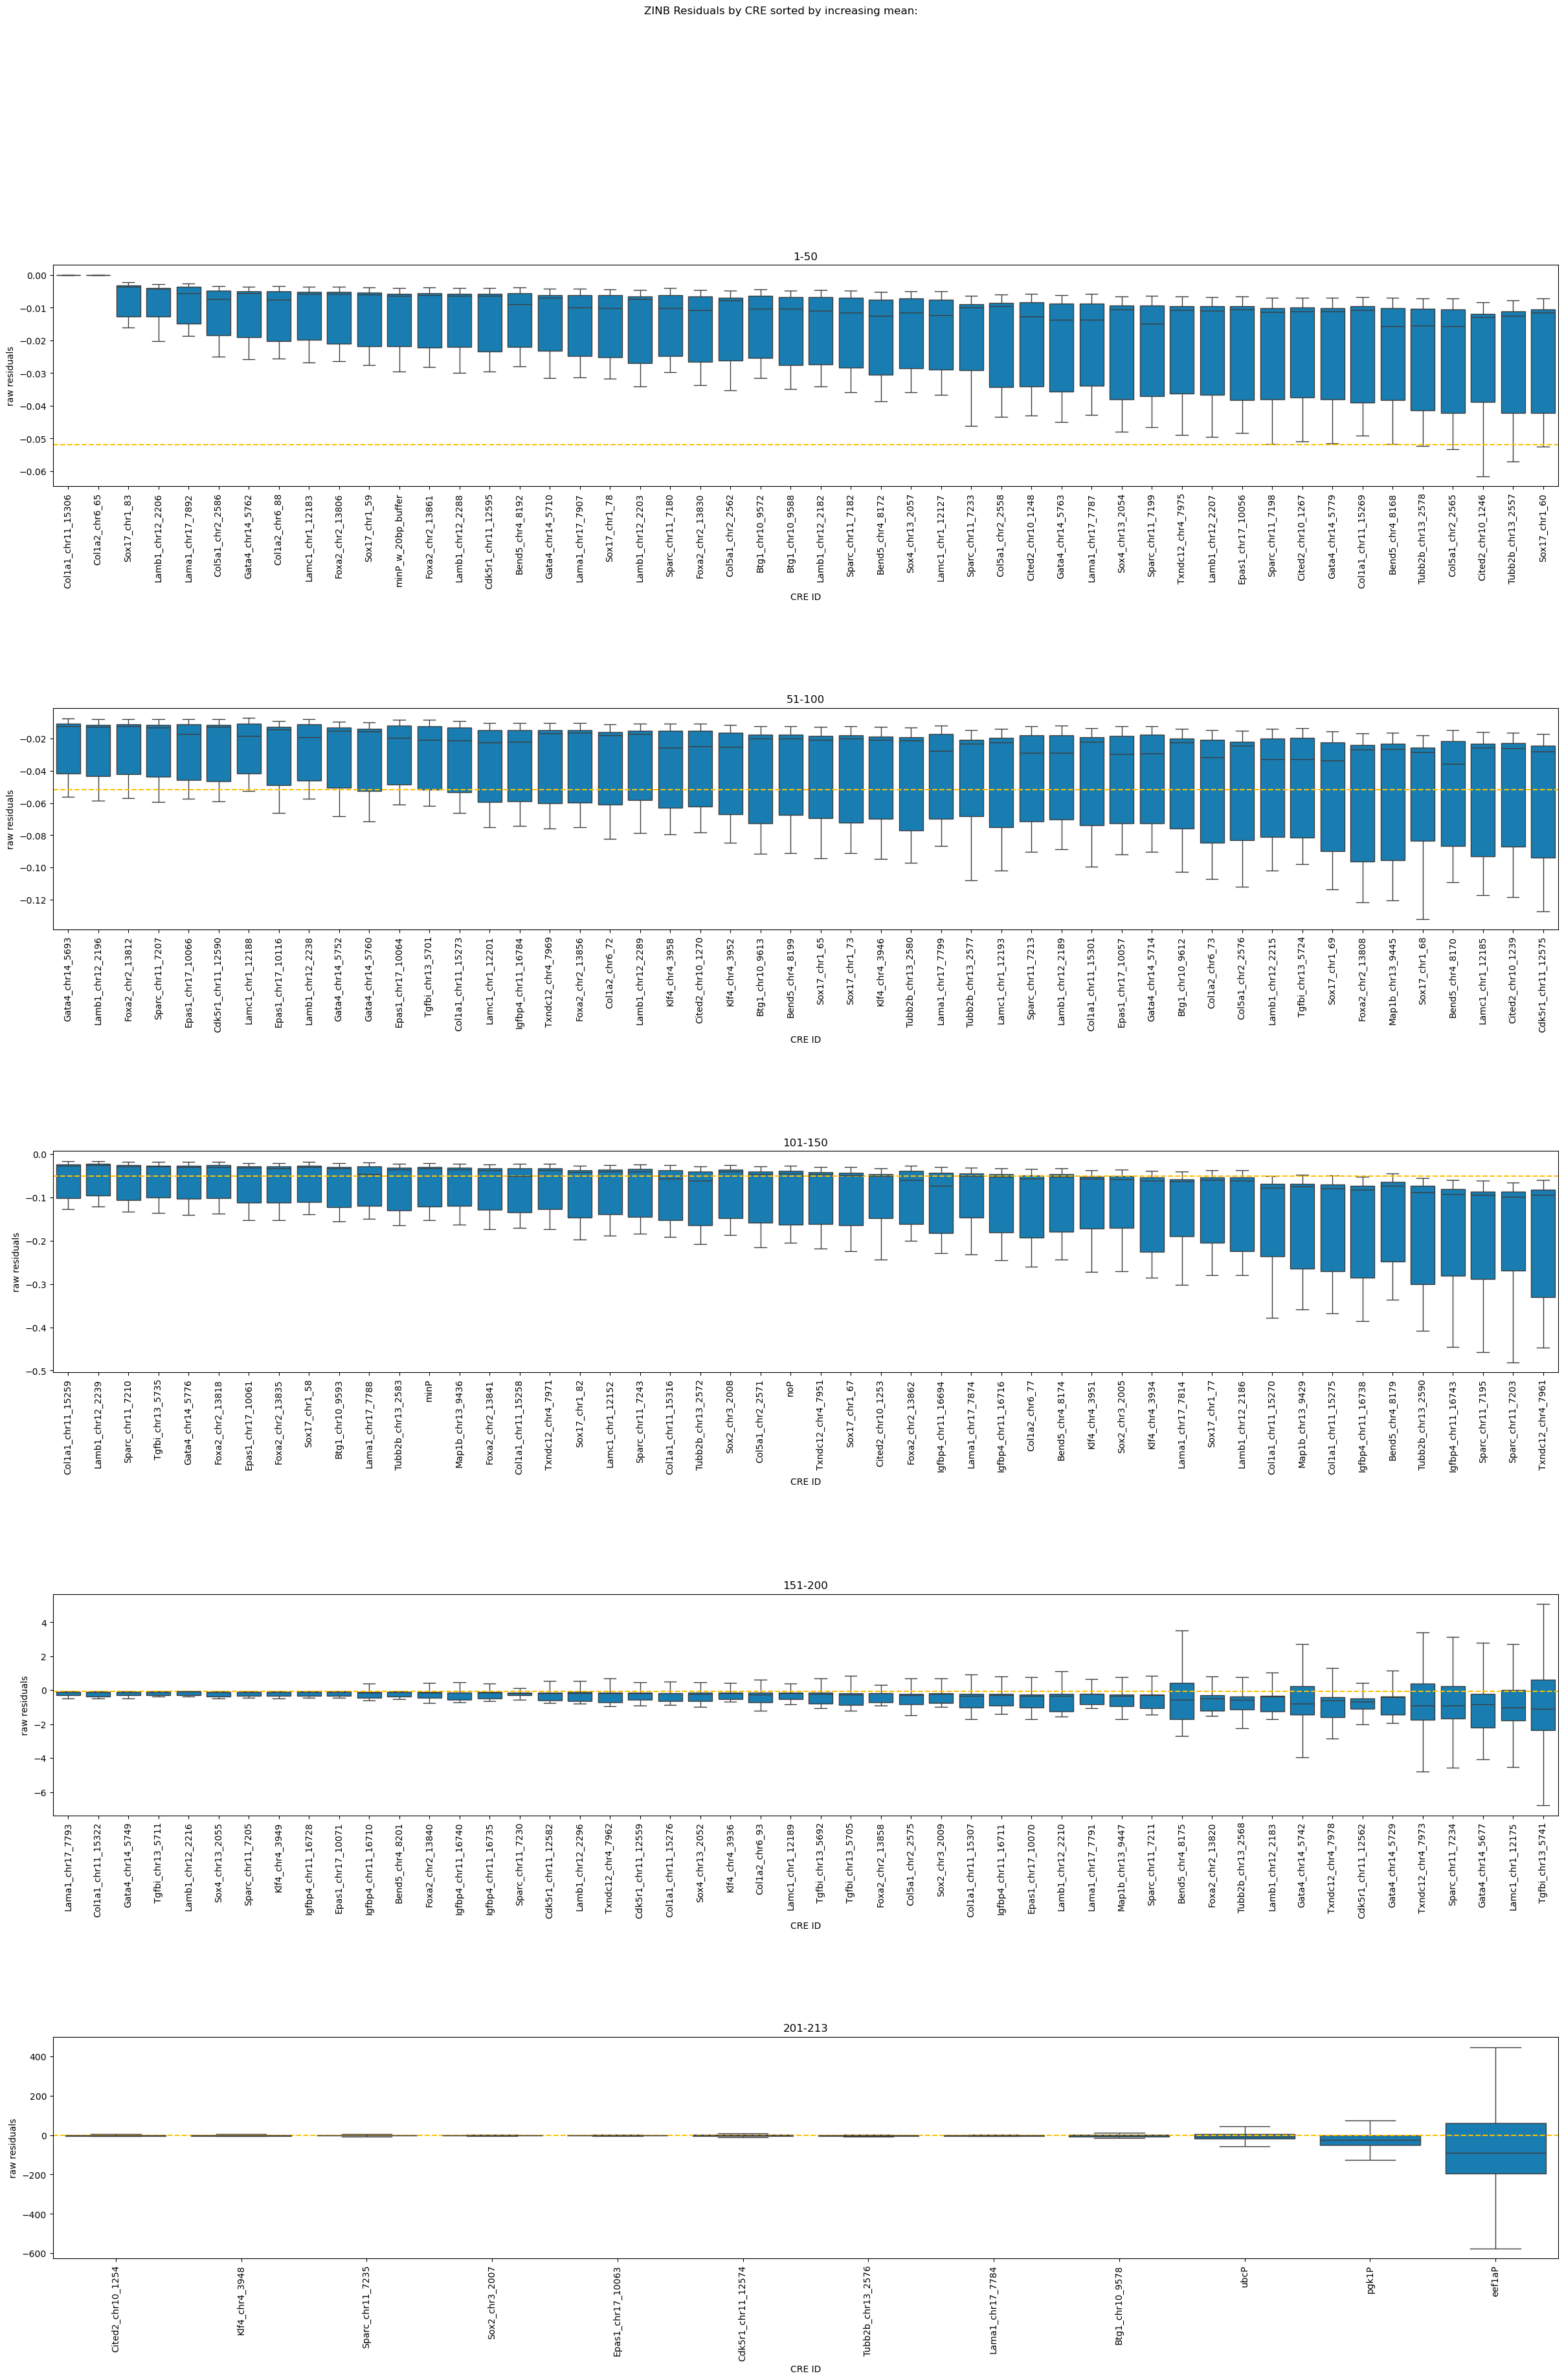

In [19]:
st = 'ZINB Residuals by CRE sorted by increasing mean:'
yl = 'raw residuals'
xl = 'CRE ID'
my = -0.0519225809675359
y = 'zinb_res'
o = False
c = subplots_cre(st, yl, xl, my, y, o)

In [ ]:
st = 'ZINB proportional residuals by CRE sorted by increasing mean:'
yl = 'residuals / observed mBC UMIs'
xl = 'CRE ID'
my = -1.883547
y = 'zinb_resnorm'
o = True
c = subplots_cre(st, yl, xl, my, y, o)

In [ ]:
st = 'ZINB proportional residuals by CRE sorted by increasing mean:'
yl = 'residuals / observed mBC UMIs'
xl = 'CRE ID'
my = -1.883547
y = 'zinb_resnorm'
o = False
c = subplots_cre(st, yl, xl, my, y, o)

# residuals

<Axes: xlabel='zinb_res', ylabel='Count'>

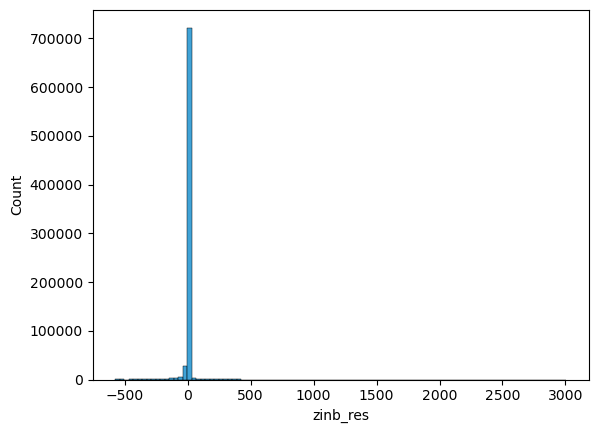

In [20]:
sns.histplot(data=preds, x = 'zinb_res', bins = 100, color = mcn_lightblue)

<Axes: xlabel='zinb_res', ylabel='Count'>

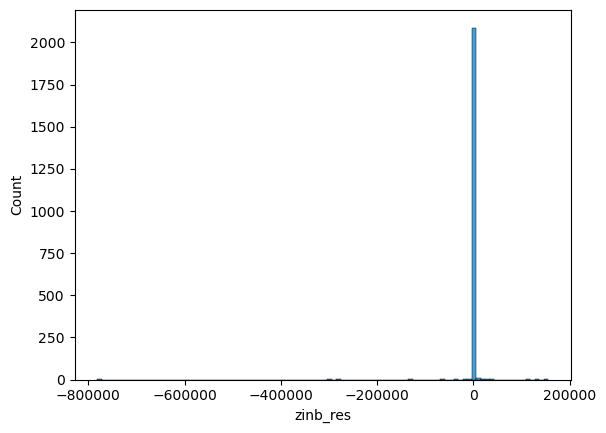

In [13]:
sns.histplot(data=preds_grouped, x = 'zinb_res', bins = 100, color = mcn_lightblue)

(0.0, 6000.0)

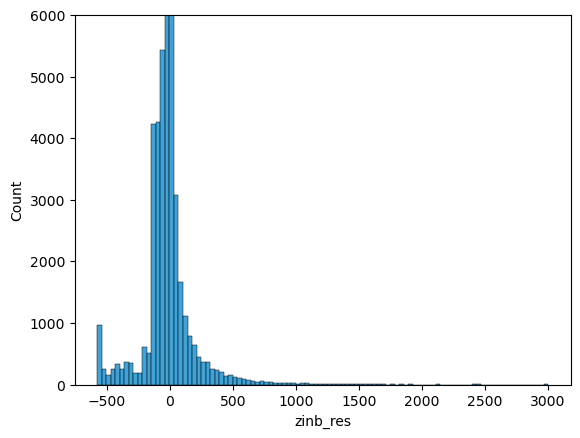

In [21]:
sns.histplot(data=preds, x = 'zinb_res', bins = 100, color = mcn_lightblue)
plt.ylim(0,6000)

(0.0, 50.0)

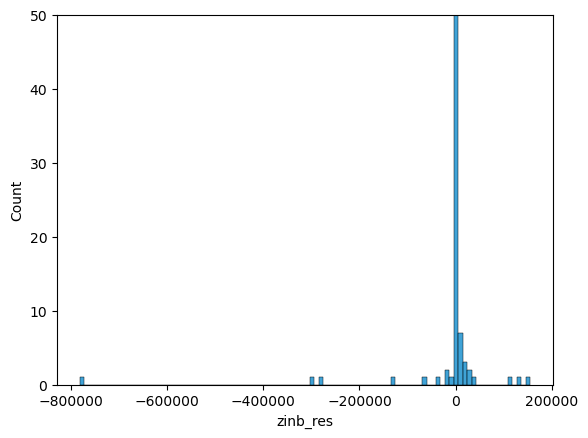

In [15]:
sns.histplot(data=preds_grouped, x = 'zinb_res', bins = 100, color = mcn_lightblue)
plt.ylim(0,50)

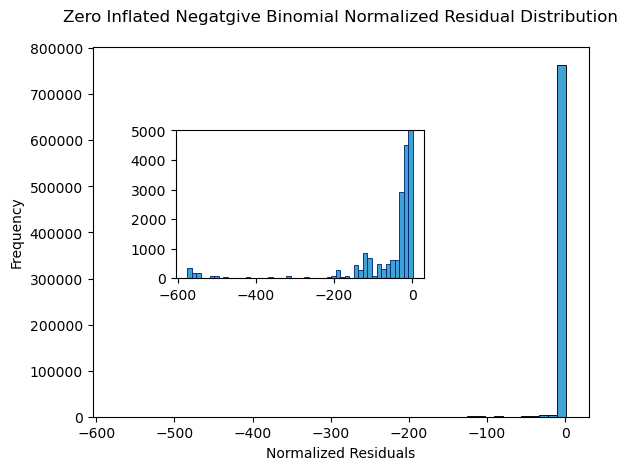

In [22]:
fig, ax = plt.subplots()
plt.title('Zero Inflated Negatgive Binomial Normalized Residual Distribution\n')
sns.histplot(data=preds, x = 'zinb_resnorm', bins = 50, color = mcn_lightblue)
plt.xlabel('Normalized Residuals')
plt.ylabel('Frequency')

axins = inset_axes(ax,  "50%", "40%" ,loc="upper left", borderpad=6)
sns.histplot(data=preds, x = 'zinb_resnorm', bins = 50, color = mcn_lightblue, ax = axins, edgecolor= mcn_navy)
plt.ylim(0,5000)
plt.xlabel('')
plt.ylabel('')
plt.savefig("zinb_normed_residuals_hist.svg")


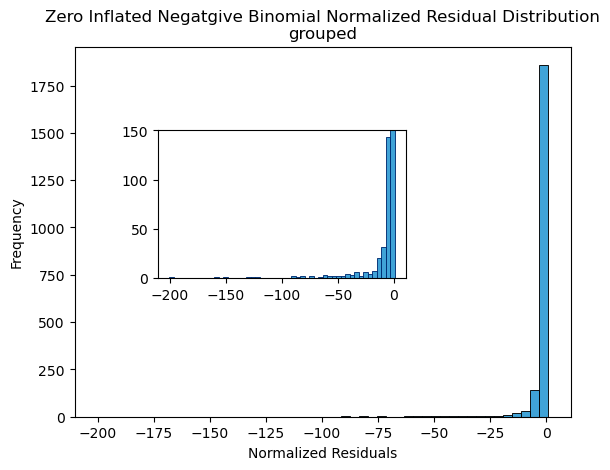

In [17]:
fig, ax = plt.subplots()
plt.title('Zero Inflated Negatgive Binomial Normalized Residual Distribution\ngrouped')
sns.histplot(data=preds_grouped, x = 'zinb_resnorm', bins = 50, color = mcn_lightblue)
plt.xlabel('Normalized Residuals')
plt.ylabel('Frequency')

axins = inset_axes(ax,  "50%", "40%" ,loc="upper left", borderpad=6)
sns.histplot(data=preds_grouped, x = 'zinb_resnorm', bins = 50, color = mcn_lightblue, ax = axins, edgecolor= mcn_navy)
plt.ylim(0,150)
plt.xlabel('')
plt.ylabel('')
plt.savefig("zinb_normed_residuals_hist_grouped.svg")


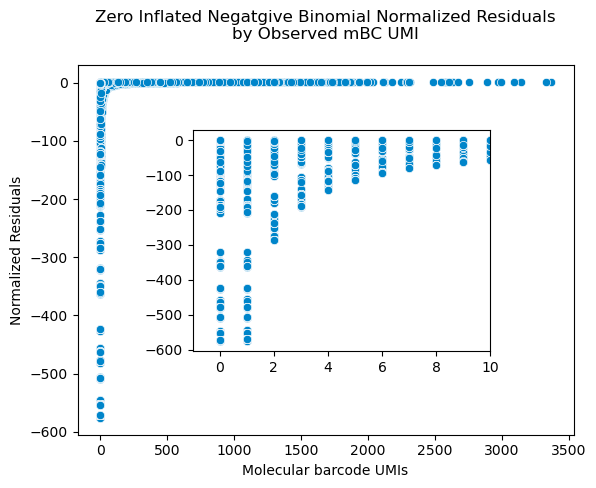

In [34]:
fig, ax = plt.subplots()
plt.title('Zero Inflated Negatgive Binomial Normalized Residuals\nby Observed mBC UMI\n')
plt.ylabel('Normalized Residuals')
plt.xlabel('Molecular barcode UMIs')
sns.scatterplot(data = preds, x = 'shendure_umis_mbc', y = 'zinb_resnorm', color=mcn_lightblue)

axins = inset_axes(ax,  "60%", "60%" ,loc="lower right", borderpad=6)
sns.scatterplot(data = preds, x = 'shendure_umis_mbc', y = 'zinb_resnorm', color=mcn_lightblue, ax = axins)
plt.xlim(-1,10)
plt.xlabel('')
plt.ylabel('')
plt.savefig("zinb_normed_residuals_over_shendure_mBC_UMIs.png", dpi=300)

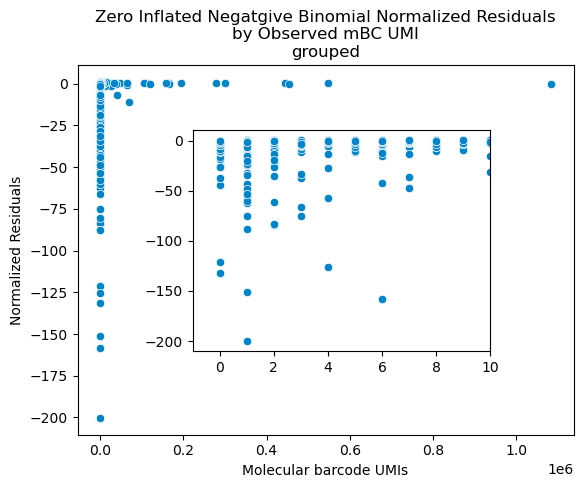

In [18]:
fig, ax = plt.subplots()
plt.title('Zero Inflated Negatgive Binomial Normalized Residuals\nby Observed mBC UMI\ngrouped')
plt.ylabel('Normalized Residuals')
plt.xlabel('Molecular barcode UMIs')
sns.scatterplot(data = preds_grouped, x = 'shendure_umis_mbc', y = 'zinb_resnorm', color=mcn_lightblue)

axins = inset_axes(ax,  "60%", "60%" ,loc="lower right", borderpad=6)
sns.scatterplot(data = preds_grouped, x = 'shendure_umis_mbc', y = 'zinb_resnorm', color=mcn_lightblue, ax = axins)
plt.xlim(-1,10)
plt.xlabel('')
plt.ylabel('')
plt.savefig("zinb_normed_residuals_over_shendure_mBC_UMIs_grouped.png", dpi=300)

In [54]:
preds_grouped.sort_values(by='zinb_resnorm').head(50)[['shendure_umis_mbc','zinb','zinb_res','zinb_resnorm']]

,,shendure_umis_mbc,zinb,zinb_res,zinb_resnorm
cell_type,CRE_id,,,,
Neuroectoderm (brain),Gata4_chr14_5729,1,201.254659,-200.254659,-200.254659
Ex. Endoderm (parietal),Sox2_chr3_2009,6,955.692952,-949.692952,-158.282159
Haematoendothelial,Lama1_chr17_7784,1,152.308498,-151.308498,-151.308498
Neuroectoderm (rostral),Lama1_chr17_7784,0,131.722772,-131.722772,-131.722772
Neuroectoderm (brain),Lama1_chr17_7784,4,506.757611,-502.757611,-125.689403
Epiblast/primitive streak,Foxa2_chr2_13858,0,121.422947,-121.422947,-121.422947
Surface Ectoderm,Gata4_chr14_5729,1,88.908047,-87.908047,-87.908047
Pluripotent,Lama1_chr17_7784,25,2221.260589,-2196.260589,-87.850424
Mesoderm,Gata4_chr14_5729,2,170.091414,-168.091414,-84.045707


In [55]:
preds_grouped.sort_values(by='zinb_resnorm').tail(50)[['shendure_umis_mbc','zinb','zinb_res','zinb_resnorm']]

shendure_umis_mbc         zinb  \
cell_type               CRE_id                                               
Ex. Endoderm (parietal) Foxa2_chr2_13820                 1113   276.420485   
Surface Ectoderm        Lamb1_chr12_2238                   10     2.482314   
Mesoderm                Bend5_chr4_8172                    11     2.704391   
Cardiomyocytes          Sparc_chr11_7210                    7     1.707731   
                        Gata4_chr14_5677                   66    16.030070   
Ex. Endoderm (parietal) Sparc_chr11_7211                 1822   441.479094   
                        Lama1_chr17_7791                 1300   310.989558   
                        Foxa2_chr2_13858                 1002   238.083374   
Neuroectoderm (rostral) Sox17_chr1_82                      36     8.537012   
Neuroectoderm (brain)   Tubb2b_chr13_2572                  77    18.197168   
Cardiomyocytes          Col1a1_chr11_15270                 25     5.865490   
Ex. Endoderm (visceral) Foxa2_chr2_13858                  179    41.914514   
Mesoderm                Sox17_chr1_83                       9     2.103561   
Ex. Endoderm (parietal) Lamb1_chr12_2189                   49    11.422678   
Haematoendothelial      Igfbp4_chr11_16743                141    32.772893   
Ex. Endoderm (parietal) Bend5_chr4_8179                   298    68.393920   
Neuroectoderm (rostral) Txndc12_chr4_7969                   2     0.454262   
Haematoendothelial      Gata4_chr14_5763                    6     1.320841   
Ex. Endoderm (parietal) Klf4_chr4_3952                     72    15.736025   
                        Bend5_chr4_8201                  1790   390.644245   
Neuroectoderm (rostral) Tubb2b_chr13_2577                  16     3.477770   
Surface Ectoderm        Lamc1_chr1_12127                    4     0.836686   
Ex. Endoderm (visceral) Bend5_chr4_8199                    55    10.920516   
Ex. Endoderm (parietal) Cited2_chr10_1239                  63    12.279741   
Surface Ectoderm        Lamc1_chr1_12201                   18     3.314022   
                        Sparc_chr11_7180                   10     1.724661   
Cardiomyocytes          Col1a1_chr11_15275                 49     8.319400   
                        Gata4_chr14_5714                    6     1.007882   
Neuroectoderm (rostral) Tubb2b_chr13_2583                  13     2.167605   
                        Cdk5r1_chr11_12582                208    33.849248   
Ex. Endoderm (visceral) Lama1_chr17_7788                   43     6.990342   
Haematoendothelial      Lamc1_chr1_12183                    3     0.481728   
Ex. Endoderm (parietal) Lama1_chr17_7784                11291  1805.336911   
Neuroectoderm (rostral) Map1b_chr13_9445                   30     4.755032   
Surface Ectoderm        Sparc_chr11_7199                    8     1.246889   
Ex. Endoderm (parietal) Lamb1_chr12_2183                 9570  1484.935199   
                        Klf4_chr4_3936                    668   103.457239   
Neuroectoderm (rostral) Tubb2b_chr13_2572                  25     3.708689   
Ex. Endoderm (parietal) Gata4_chr14_5729                 3979   520.914879   
Cardiomyocytes          Lama1_chr17_7787                    1     0.128674   
Neuroectoderm (rostral) Cdk5r1_chr11_12590                 10     1.238907   
Cardiomyocytes          Gata4_chr14_5760                    9     1.039882   
Ex. Endoderm (parietal) minP_w_20bp_buffer                  2     0.213638   
                        Epas1_chr17_10063                4614   492.380354   
Haematoendothelial      Lamb1_chr12_2203                    8     0.722999   
Neuroectoderm (rostral) Col1a1_chr11_15276                240    19.578686   
                        Sox17_chr1_69                      50     3.480950   
Cardiomyocytes          Igfbp4_chr11_16784                 15     0.986975   
Neuroectoderm (rostral) Sox4_chr13_2057                    28     1.355869   
Haematoendothelial      Sox17_chr1_68                      23     

In [57]:
obs = 10
pred = 9


res = obs - pred
res_norm = (obs-pred)/obs
print(res, res_norm)

1 0.1


In [58]:
obs = 10
pred = 11


res = obs - pred
res_norm = (obs-pred)/obs
print(res, res_norm)

-1 -0.1


In [59]:
obs = 100
pred = 1


res = obs - pred
res_norm = (obs-pred)/obs
print(res, res_norm)

99 0.99


In [63]:
obs = 100
pred = 199


res = obs - pred
res_norm = (obs-pred)/obs
print(res, res_norm)

-99 -0.99


<Axes: title={'center': 'Zero Inflated Negatgive Binomial Normalized Residuals\nby Observed mBC UMI\ngroup cell type sum'}, xlabel='Molecular barcode UMIs', ylabel='Normalized Residuals'>

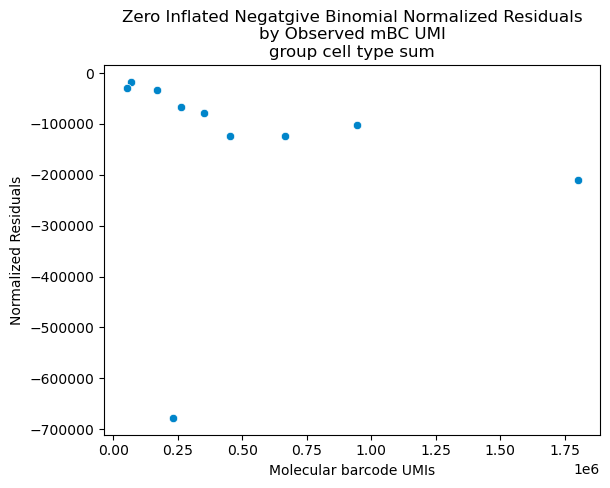

In [24]:
a = preds.groupby(by='cell_type').sum()

fig, ax = plt.subplots()
plt.title('Zero Inflated Negatgive Binomial Normalized Residuals\nby Observed mBC UMI\ngroup cell type sum')
plt.ylabel('Normalized Residuals')
plt.xlabel('Molecular barcode UMIs')
sns.scatterplot(data = a, x = 'shendure_umis_mbc', y = 'zinb_resnorm', color=mcn_lightblue)




In [51]:
a['num_cells'] = preds['cell_type'].value_counts()
a.sort_values(by='zinb_resnorm').head(50)[['num_cells','shendure_umis_mbc','zinb','zinb_resnorm']]

,num_cells,shendure_umis_mbc,zinb,zinb_resnorm
cell_type,,,,
Ex. Endoderm (parietal),77898,232424,1.357393e+06,-677983.004773
Pluripotent,165773,1800660,2.244504e+06,-210827.218547
Mesoderm,128596,452921,4.327356e+05,-124625.484369
Neuroectoderm (brain),135976,665793,4.815683e+05,-124411.845178
Epiblast/primitive streak,66949,944637,6.919812e+05,-101340.632308
Ex. Endoderm (visceral),51713,353833,2.971682e+05,-79441.783661
Surface Ectoderm,86927,264185,2.220476e+05,-66242.889935
Haematoendothelial,21749,169728,1.355826e+05,-34017.392414
Neuroectoderm (rostral),30630,52329,1.018270e+05,-29445.329704


In [26]:
a[a['zinb_resnorm']<=-300000]

,rep_id,CRE_id,CRE_class,umis_obc,shendure_umis_mbc,zinb,nb,pm,zip,zinb_res,zip_res,nb_res,pm_res,shendure_umis_mbc_no_zeros,zinb_resnorm,zip_resnorm,nb_resnorm,pm_resnorm
cell_type,,,,,,,,,,,,,,,,,,
Ex. Endoderm (parietal),2B12B12B12B12B12B12B12B12B12B12B12B12B12B12B12...,Bend5_chr4_8168Bend5_chr4_8174Bend5_chr4_8192B...,devCREdevCREdevCREdevCREdevCREdevCREdevCREdevC...,16719365,232424,1.357393e+06,-81546.943034,-204459.187503,153022.809462,-1.124969e+06,79401.190538,313970.943034,436883.187503,297507,-677983.004773,-72007.11193,113449.840443,225516.331887


In [47]:
a['num_cells'] = preds['cell_type'].value_counts()

In [48]:
preds['cell_type'].value_counts()

cell_type
Pluripotent                  165773
Neuroectoderm (brain)        135976
Mesoderm                     128596
Surface Ectoderm              86927
Ex. Endoderm (parietal)       77898
Epiblast/primitive streak     66949
Ex. Endoderm (visceral)       51713
Neuroectoderm (rostral)       30630
Haematoendothelial            21749
Cardiomyocytes                12037
Name: count, dtype: int64

In [49]:
a

,rep_id,CRE_id,CRE_class,umis_obc,shendure_umis_mbc,zinb,nb,pm,zip,zinb_res,zip_res,nb_res,pm_res,shendure_umis_mbc_no_zeros,zinb_resnorm,zip_resnorm,nb_resnorm,pm_resnorm,num_cells
cell_type,,,,,,,,,,,,,,,,,,,
Cardiomyocytes,2B12B12B12B12B12B12B12B12B12B12B12B12B12B12B12...,Bend5_chr4_8175Bend5_chr4_8192Btg1_chr10_9572B...,devCREdevCREdevCREdevCREdevCREdevCREdevCREdevC...,2382078,69992,6.978137e+04,-25711.947652,-23666.874916,39301.027384,2.106312e+02,30690.972616,9.570395e+04,9.365887e+04,80334,-17530.858500,-13169.496690,30019.072721,28017.115123,12037
Epiblast/primitive streak,2B12B12B12B12B12B12B12B12B12B12B12B12B12B12B12...,Bend5_chr4_8170Bend5_chr4_8199Bend5_chr4_8201B...,devCREdevCREdevCREdevCREdevCREdevCREdevCREdevC...,12951252,944637,6.919812e+05,-105139.948128,-73097.198038,479690.674870,2.526558e+05,464946.325130,1.049777e+06,1.017734e+06,999807,-101340.632308,-125005.921988,136290.000724,106730.226074,66949
Ex. Endoderm (parietal),2B12B12B12B12B12B12B12B12B12B12B12B12B12B12B12...,Bend5_chr4_8168Bend5_chr4_8174Bend5_chr4_8192B...,devCREdevCREdevCREdevCREdevCREdevCREdevCREdevC...,16719365,232424,1.357393e+06,-81546.943034,-204459.187503,153022.809462,-1.124969e+06,79401.190538,3.139709e+05,4.368832e+05,297507,-677983.004773,-72007.111930,113449.840443,225516.331887,77898
Ex. Endoderm (visceral),2B12B12B12B12B12B12B12B12B12B12B12B12B12B12B12...,Bend5_chr4_8174Bend5_chr4_8199Bend5_chr4_8201C...,devCREdevCREdevCREdevCREdevCREdevCREdevCREdevC...,9696758,353833,2.971682e+05,-110996.567047,-93272.940034,199772.398365,5.666480e+04,154060.601635,4.648296e+05,4.471059e+05,398464,-79441.783661,-70570.145401,129677.948267,112895.908186,51713
Haematoendothelial,2B12B12B12B12B12B12B12B12B12B12B12B12B12B12B12...,Bend5_chr4_8168Col5a1_chr2_2558Epas1_chr17_100...,devCREdevCREdevCREdevCREdevCREdevCREdevCREdevC...,4044698,169728,1.355826e+05,-45112.834903,-36627.794153,94828.137857,3.414542e+04,74899.862143,2.148408e+05,2.063558e+05,188620,-34017.392414,-32860.671565,52767.853153,44746.442179,21749
Mesoderm,2B12B12B12B12B12B12B12B12B12B12B12B12B12B12B12...,Bend5_chr4_8174Epas1_chr17_10061Gata4_chr14_57...,devCREdevCREdevCREdevCREdevCREdevCREdevCREdevC...,22170486,452921,4.327356e+05,-342693.535645,-315831.673067,264291.094672,2.018536e+04,188629.905328,7.956145e+05,7.687527e+05,566335,-124625.484369,-97830.115391,379112.316721,352931.267628,128596
Neuroectoderm (brain),2B12B12B12B12B12B12B12B12B12B12B12B12B12B12B12...,Btg1_chr10_9572Gata4_chr14_5710Klf4_chr4_3952L...,devCREdevCREdevCREdevCREdevCREdevCREdevCREdevC...,19580202,665793,4.815683e+05,-357033.978583,-290547.124532,374974.754311,1.842247e+05,290818.245689,1.022827e+06,9.563401e+05,785492,-124411.845178,-132735.879379,396865.438562,333639.232269,135976
Neuroectoderm (rostral),2B12B12B12B12B12B12B12B12B12B12B12B12B12B12B12...,Bend5_chr4_8175Btg1_chr10_9588Btg1_chr10_9612C...,devCREdevCREdevCREdevCREdevCREdevCREdevCREdevC...,2899026,52329,1.018270e+05,-80961.070472,-96197.234093,28643.193352,-4.949802e+04,23685.806648,1.332901e+05,1.485262e+05,79339,-29445.329704,-8722.847690,89126.509114,103181.010407,30630
Pluripotent,2B12B12B12B12B12B12B12B12B12B12B12B12B12B12B12...,Bend5_chr4_8172Cdk5r1_chr11_12559Col1a1_chr11_...,devCREdevCREdevCREdevCREdevCREdevCREdevCREdevC...,25761228,1800660,2.244504e+06,-214077.849363,-222665.320354,859697.828593,-4.438441e+05,940962.171407,2.014738e+06,2.023325e+06,1935926,-210827.218547,-168464.520503,297339.153955,303546.006953,165773


In [31]:
preds.shendure_umis_mbc.describe()

count    778248.000000
mean          6.433042
std          54.991022
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        3368.000000
Name: shendure_umis_mbc, dtype: float64

In [9]:
cr_whole = pd.read_csv('/home/mcn26/palmer_scratch/tabula_data/formatted/COHEN_RETINA.tsv', sep='\t')
cr_whole

,cellBC,rep_id,CRE_id,cell_type_annotation,MPRA_BC,reads_MPRA_BC,UMIs_MPRA_BC,transfection_BC,reads_transfection_BC
0,AAACCCAAGACAAGCC,1,ebox_gcagctgg_to_acagctgg,Glia,CTCCGCAGCCTAGATGGTATACAC,1,1,AACAACAC,0
1,AAACCCAAGACAAGCC,1,ebox_gcagctgg_to_acagctgg,Glia,CTTGGGCCATGTTTTTCTAATAGT,2,1,AACAACAC,0
2,AAACCCAAGACAAGCC,1,ebox_gcagctgg_to_ccagctgg,Glia,ATGGACCGTCTCGTGCACGTAATT,1,1,AACAAGGT,0
3,AAACCCAAGACAAGCC,1,ebox_gcagctgg_to_ccagctgg,Glia,TCCGTCTACATACGAACAATTATT,4,1,AACAAGGT,0
4,AAACCCAAGACAAGCC,1,ebox_gcagctgg_to_ggagctgg,Glia,CGTTTGTTACCATAGCTGCAAGAA,1,1,AACCAGCC,0
...,...,...,...,...,...,...,...,...,...
2005892,TTTGTTGTCGTTCAGA,2,combo_Q50_crx3_crx5,Rod,AACTGTACATGGATGCACGTACTT,1,1,CGTAGCTT,0
2005893,TTTGTTGTCGTTCAGA,2,combo_Q50_crx3_crx5,Rod,TATACGTTGTACTAATGCTTACTG,2,1,CGTAGCTT,0
2005894,TTTGTTGTCGTTCAGA,2,combo_Q50_crx3_crx5,Rod,TTCTTGTCCCTGTCCTTTTCTAGA,2,1,CGTAGCTT,0
2005895,TTTGTTGTCGTTCAGA,2,wt_1,Rod,TTTCGTTTAAGTGCCGTAAGTGCG,1,1,CGTTCTCG,0


<Axes: xlabel='UMIs_MPRA_BC', ylabel='Count'>

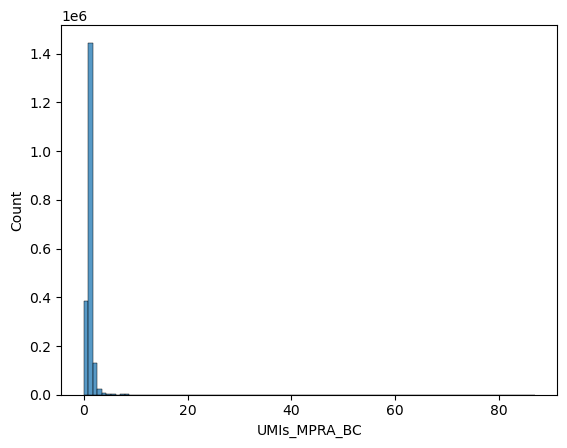

In [11]:
sns.histplot(cr_whole.UMIs_MPRA_BC, bins=100)

In [12]:
cr_whole.reads_MPRA_BC.describe()

count    2.005897e+06
mean     2.996059e+02
std      3.513344e+03
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      2.741310e+05
Name: reads_MPRA_BC, dtype: float64

(array([6.4877e+05, 5.3397e+04, 1.4673e+04, 6.4180e+03, 3.5970e+03,
        2.1160e+03, 1.4710e+03, 1.0390e+03, 7.9600e+02, 5.7100e+02,
        4.6300e+02, 3.6700e+02, 3.0300e+02, 2.5600e+02, 2.0700e+02,
        1.7600e+02, 1.4300e+02, 1.2400e+02, 1.1400e+02, 9.7000e+01,
        6.1000e+01, 7.8000e+01, 6.0000e+01, 5.7000e+01, 4.6000e+01,
        5.1000e+01, 5.4000e+01, 3.7000e+01, 3.9000e+01, 3.9000e+01,
        3.0000e+01, 2.6000e+01, 2.3000e+01, 2.3000e+01, 1.5000e+01,
        1.9000e+01, 1.2000e+01, 1.0000e+01, 1.4000e+01, 1.8000e+01,
        9.0000e+00, 1.2000e+01, 8.0000e+00, 1.0000e+01, 9.0000e+00,
        7.0000e+00, 1.2000e+01, 4.0000e+00, 7.0000e+00, 7.0000e+00,
        7.0000e+00, 5.0000e+00, 6.0000e+00, 5.0000e+00, 4.0000e+00,
        5.0000e+00, 6.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00,
        4.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00,
        3.0000e+00, 1.0000e+00, 2.0000e+00, 1.00

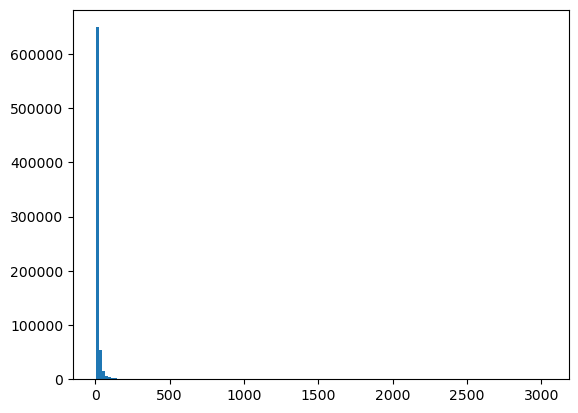

In [18]:
plt.hist(cm.observed_umis_MPRA_BC, bins=150)